In [31]:
import numpy as np
import pandas as pd 
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix

### 加载数据

In [8]:
data_train=pd.read_csv('./data/kaggle/train.csv')
data_test=pd.read_csv('./data/kaggle/test.csv')
y=data_train['label']
x=data_train.drop(['label'],axis=1)

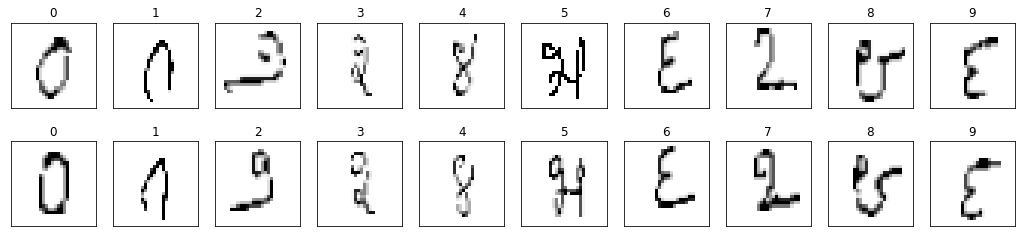

In [36]:
# 可视化数据
x1=np.array(x).reshape(len(data_train),28,28)
plt.figure(figsize=(18,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x1[i],cmap='Greys')
    plt.title(y[i])
    plt.xticks([])
    plt.yticks([])

Y_train=keras.utils.to_categorical(y)
X_train=np.array(x/255).reshape(len(data_train),28,28,1)
Y_test=data_test['id']
X_test=np.array(data_test.drop(['id'],axis=1)/255).reshape(len(data_test),28,28,1)

### 三层cnn模型
    1.卷积层conv1：10个3x3的卷积核,strides=1,padding=1(same)，output=28x28x10
    batchnormalization1:
    activation funcion1:relu
    Maxpool1: 2x2,strides=2,padding=valid,output=14x14x10

    2.卷积层conv2：20个3x3的卷积核,strides=1,padding=1(same)，output=14x14x20
    batchnormalization2:
    activation funcion2:relu
    Maxpool2: 2x2,strides=2,padding=valid,output=7x7x10

    3.卷积层conv3：40个2x2的卷积核,strides=1,padding=0(valid)，output=6x6x40
    batchnormalization3:
    activation funcion3:relu
    Maxpool2: 2x2,strides=2,padding=valid,output=3x3x40

    4.flatten()
    全连接层dense(10) 
    activation:softmax

In [37]:
#参数设置
np.random.seed(0)
#tf.random.set_seed(0)
numberfilters1,numberfilters2,numberfilters3=10,20,40
sizefilter1,sizefilter2,sizefilter3=3,3,2
#搭建模型
cnn=Sequential()
cnn.add(Conv2D(filters=numberfilters1,
              kernel_size=(sizefilter1,sizefilter1),
              strides=(1,1),
              padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

cnn.add(Conv2D(filters=numberfilters2,
              kernel_size=(sizefilter2,sizefilter2),
              strides=(1,1),
              padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

cnn.add(Conv2D(filters=numberfilters3,
              kernel_size=(sizefilter3,sizefilter3),
              strides=(1,1),
              padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

cnn.add(Flatten())
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
summary=cnn.fit(x=X_train,y=Y_train, validation_split=0.15, epochs=10, batch_size=64, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
50944/51000 [============================>.] - ETA: 0s - loss: 0.1852 - acc: 0.9503WARNING:tensorflow:From C:\jupy\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
51000/51000 [==============================] - 43s 852us/sample - loss: 0.1850 - acc: 0.9503 - val_loss: 0.0535 - val_acc: 0.9831
Epoch 2/10
51000/51000 [==============================] - 43s 850us/sample - loss: 0.0373 - acc: 0.9900 - val_loss: 0.0389 - val_acc: 0.9874
Epoch 3/10
51000/51000 [==============================] - 44s 868us/sample - loss: 0.0246 - acc: 0.9931 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 4/10
51000/51000 [==============================] - 44s 857us/sample - loss: 0.0189 - acc: 0.9945 

### 结果分析

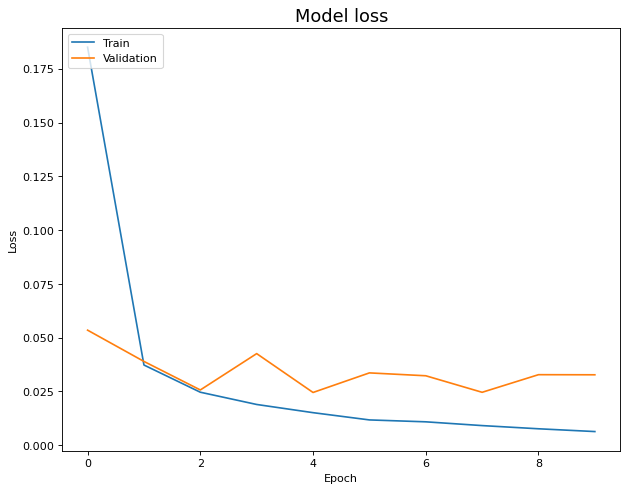

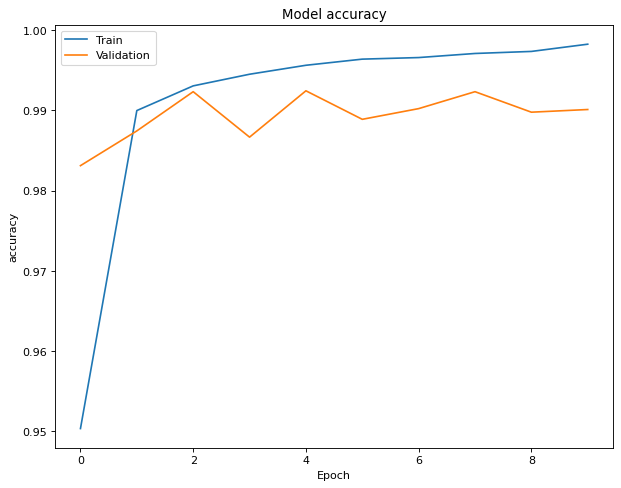

Train accuarcy: 0.9983
Validation accuracy:0.9901


In [54]:
#loss
plt.figure(figsize=(9,7), dpi=80)
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#accurcy
plt.figure(figsize=(9,7),dpi=80)
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()
print('Train accuarcy: {:.4f}'.format(summary.history['acc'][-1]))
print('Validation accuracy:{:.4f}'.format(summary.history['val_acc'][-1]))

In [55]:
pre_test = cnn.predict_classes(X_test).astype(int)
submission=pd.DataFrame({'id':data_test['id'],'label':pre_test})
submission.to_csv('./data/result.csv',index=False)